<a href="https://colab.research.google.com/github/pavansatya/NutriWeb/blob/main/open_food_facts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LOAD DATA


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# Read TSV file and change path according to your directory
df = pd.read_csv('/content/drive/MyDrive/Nutrivision/en.openfoodfacts.org.products.tsv', sep='\t')
df.head(10)

<ipython-input-2-a48b98fbf934>:4: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Nutrivision/en.openfoodfacts.org.products.tsv', sep='\t')


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,4559,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,16087,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,16094,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,16100,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055651,2017-03-09T10:34:11Z,1489055651,2017-03-09T10:34:11Z,Breadshop Honey Gone Nuts Granola,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,16117,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055730,2017-03-09T10:35:30Z,1489055730,2017-03-09T10:35:30Z,Organic Long Grain White Rice,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,16124,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055711,2017-03-09T10:35:11Z,1489055712,2017-03-09T10:35:12Z,Organic Muesli,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.0,7.0,NaN,NaN
8,16193,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055651,2017-03-09T10:34:11Z,1489055651,2017-03-09T10:34:11Z,Organic Dark Chocolate Minis,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,16513,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055654,2017-03-09T10:34:14Z,1489055654,2017-03-09T10:34:14Z,Organic Sunflower Oil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.columns.values

array(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'generic_name', 'quantity', 'packaging', 'packaging_tags',
       'brands', 'brands_tags', 'categories', 'categories_tags',
       'categories_en', 'origins', 'origins_tags', 'manufacturing_places',
       'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_en',
       'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo',
       'cities', 'cities_tags', 'purchase_places', 'stores', 'countries',
       'countries_tags', 'countries_en', 'ingredients_text', 'allergens',
       'allergens_en', 'traces', 'traces_tags', 'traces_en',
       'serving_size', 'no_nutriments', 'additives_n', 'additives',
       'additives_tags', 'additives_en', 'ingredients_from_palm_oil_n',
       'ingredients_from_palm_oil', 'ingredients_from_palm_oil_tags',
       'ingredients_that_may_be_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil',
   

These are the columns that only have null values in them so I am considering to drop these columns as they do not contribute meaningful information.

In [4]:
# List of columns with only null values
df.drop_duplicates(inplace=True)
null_columns = df.columns[df.isnull().all()].tolist()
null_columns

['no_nutriments',
 'ingredients_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil',
 'nutrition_grade_uk',
 '-butyric-acid_100g',
 '-caproic-acid_100g',
 '-lignoceric-acid_100g',
 '-cerotic-acid_100g',
 '-melissic-acid_100g',
 '-elaidic-acid_100g',
 '-mead-acid_100g',
 '-erucic-acid_100g',
 '-nervonic-acid_100g',
 'chlorophyl_100g',
 'glycemic-index_100g',
 'water-hardness_100g']

In [5]:
# Dropping those columns which only has Null values
df.drop(columns = null_columns, inplace=True, axis=1)

We are also dropping **energy-from-fat_100g** column as recent updates to labeling regulations (e.g., the FDA's 2016 overhaul of nutrition labels in the U.S.) have shifted focus away from highlighting fat calories, as it is now more common to emphasize the type of fat (e.g., saturated fat, trans fat) rather than the total calories from fat. Instead, the label typically lists:

**How it is calculated?**

If the label does not explicitly state the energy from fat, you can calculate it using the following steps:

1.   Find the total fat content listed on the label (usually in grams).

2.   Multiply the total fat grams by 9 (since fat provides 9 calories per gram).

In [6]:
df.drop(columns = ['energy-from-fat_100g'], inplace=True, axis=1)
df.shape

(356027, 146)

In [9]:
df.iloc[:, 59:].head(7)

,energy_100g,fat_100g,saturated-fat_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,...,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2243.0,28.57,28.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0
2,1941.0,17.86,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,2540.0,57.14,5.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0
4,1552.0,1.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1933.0,18.27,1.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1490.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


For columns like **nutrition-score-uk_100g**, **nutrition-score-fr_100g**,

One of our primary goals while starting our project is to include sustainability and recommend eco-friendly products. But, when we looked at the **carbon-footprint_100g** column of our dataset, over 99.9% of the data has null values. This is because of the following reasons:

1.   Unlike nutrient facts (e.g., calories, fat, protein), there are no widespread regulatory requirements for disclosing carbon footprint information on food labels.
2.   Governments and regulatory bodies (e.g., FDA in the U.S., EFSA in the EU) have not yet mandated carbon footprint labeling, so most manufacturers are not obligated to include it.
3.   Variability in supply chains, for example: the carbon footprint of an orange can vary significantly depending on whether it was grown locally or imported from another country.

**What we did**:

For those columns, where data is null, we imputed them with *no informartion* in place of null values.

In [19]:
df['carbon-footprint_100g'].isna().sum()

355749

The null values are in columns containing nutrient facts about food products, such as energy, proteins, carbs, etc. We found that there are 0 values (for products containing no such nutrient in them) and null values.

**0** implies that the nutrient is confirmed to be absent in the product (e.g., a sugar-free product has 0g of sugar). **Null** (or **NaN**) indicates that the value is unknown or not provided. This distinction is important for data accuracy and analysis.

**For example**:
*   If a nutrient is not listed on the label, it could mean the product contains a negligible amount, but the exact value is unknown. In some regions, certain nutrients are not required to be listed on the label unless they are present above a specific threshold.

*   Entering 0 in such cases could misrepresent the data, as it might not be accurate.

**What we did**:

After thorough research and checking with the original database, for simplifying the dataset for analysis or modeling. We replaced them with 0 as null values would cause issues.

In [7]:
[df.columns.get_loc('energy_100g'), df.columns.get_loc('ph_100g')]

[59, 138]

In [38]:
# Lets see how many null values are present in each column with percentages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

null_percentages = df.isnull().mean() * 100
null_percentages = null_percentages[null_percentages > 0]
fig = px.bar(x=null_percentages.index, y=null_percentages.values, labels={'x': 'Columns', 'y': 'Percentage of Null Values'}, title='Percentage of Null Values in Each Column')
plt.figure(figsize=(20, 6))
fig.show()

<Figure size 2000x600 with 0 Axes>

In [ ]:
df.iloc[:, 59:139] = df.iloc[:, 59:139].fillna(0)

*countries _en* contains the list of countries in english where the product is sold. So, we are creating new datarame that exclusively have data of products manufactured in USA only

In [ ]:
# df.countries_en.fillna('unknown country', inplace=True)
# filter = df.countries_en == 'United States'
# us_df = df[filter]

Now, we can either drop all the column that only has zero values or follow these step:


1.   If you expect that these columns might be filled with data in the future (e.g., if they are related to features that are not yet available), you might choose to keep them for now.
2.   If you have a large number of columns with null values, it might be worth checking if there are patterns in the data collection process that led to these nulls.
3.   Consider how these columns might impact the performance of your recommender system. Including irrelevant or empty features can lead to overfitting or increased complexity without any benefit.

In [ ]:
# # List of columns with only zero values
# zero_columns = us_df.columns[(us_df == 0).all()].tolist()
# # List of columns with only null values
# null_columns = us_df.columns[us_df.isnull().all()].tolist()

# print(len(zero_columns), len(null_columns))

In [ ]:
# columns_to_drop = null_columns + zero_columns
# us_df.drop(columns = columns_to_drop, inplace=True, axis=1)
# us_df.shape

There are few columns where we only have 1 or 2 values out of 173159, those are :  
1. first_packaging_code_geo
2. cities_tags
3. ingredients_from_palm_oil_n
4. ingredients_from_palm_oil_tags'
5. -alpha-linolenic-acid_100g
6. omega-3-fat_100g
7. serum-proteins_100g
8. molybdenum_100g
9. cocoa_100g

In [ ]:
# us_df.main_category_en.fillna('no category', inplace=True)
# us_df.main_category_en.value_counts()

### suggestion module

This will help us to give top 5 similar words incase we give wrong input i.e. spelling mistakes, incomplete words

In [ ]:
# !pip install rapidfuzz

In [ ]:
# import pandas as pd
# from rapidfuzz import fuzz, process

# # Function to correct vowels
# def correct_vowels(word, candidates):
#     vowels = 'aeiou'
#     word_lower = word.lower()
#     corrected_values = []

#     for value in corrected_values:
#         value_lower = value.lower()
#         # Replace each vowel in the word with each vowel in the candidate to find the best match
#         if all(
#             (c in vowels and w in vowels) or c == w
#             for c, w in zip(value_lower, word_lower.ljust(len(value_lower)))
#         ):
#             corrected_values.append(value)

#     return corrected_values

# # Function to find the best matches
# def suggest_categories(input_word, categories, top_n=5):
#     # Normalize the categories
#     categories = categories.str.lower().unique()

#     # Step 1: Use Levenshtein distance to find initial matches
#     matches = process.extract(input_word.lower(), categories, scorer=fuzz.ratio, limit=len(categories))

#     # Step 2: Filter matches and correct for vowel errors
#     top_matches = [match[0] for match in matches if match[1] > 60]  # Only keep matches with similarity > 60
#     corrected_matches = correct_vowels(input_word, top_matches)

#     # Step 3: Match corrections with the original `categories` column
#     valid_matches = [match for match in (corrected_matches or top_matches) if match in categories]

#     # Step 4: Return the top N suggestions
#     suggestions = sorted(
#         valid_matches,  # Use only matches found in `categories`
#         key=lambda x: process.extractOne(input_word, [x], scorer=fuzz.ratio)[1],
#         reverse=True
#     )[:top_n]

#     return suggestions

In [ ]:
# # Example DataFrame
# data = pd.DataFrame(us_df['main_category_en'], columns=['main_category_en'])

# # User input
# user_input = "ickls"

# # Get suggestions
# suggestions = suggest_categories(user_input, df["categories"])
# print("Suggestions:", suggestions)

we are creating another dataframe which consists of product name and all nutrients per 100g of the product

# DATA CLEANING

In [ ]:
macros_df_columns = [col for col in df.columns if col.endswith('100g') and not col.startswith('-')]
# Include 'product_name' in the list of columns
columns_to_select = ['code'] + ['product_name'] + macros_df_columns

# Create a new DataFrame with the selected columns
nutrients_df = df[columns_to_select]
nutrients_df['energy_100g'] = round(nutrients_df['energy_100g']/4.184, 2)

<ipython-input-52-ad546a83fc30>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nutrients_df['energy_100g'] = round(nutrients_df['energy_100g']/4.184, 2)


In [ ]:
# These are the rows where there is no data regarding nutritional facts which makes it very important for our dataset
df[df.energy_100g.isnull()].value_counts()

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,count
code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,main_category,main_category_en,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-montanic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-gondoic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,


In [ ]:
macros_df = df[macros_df_columns]
null_rows = macros_df[macros_df.isnull().all(axis=1)]

In [ ]:
null_row_indices = df.index[macros_df.isnull().all(axis=1)].tolist()
ids_with_all_null_nutritional_facts = df.loc[null_row_indices, ['code', 'product_name', 'energy_100g']]
ids_with_all_null_nutritional_facts

,code,product_name,energy_100g
0,3087,Farine de blé noir,NaN
46,20114,Naturablue original,NaN
47,24600,Filet de bœuf,NaN
49,27205,NaN,NaN
51,30113,Naturakrill original,NaN
...,...,...,...
356020,99410148,NaN,NaN
356021,9948282780603,Tomato & ricotta,NaN
356023,9970229501521,乐吧泡菜味薯片,NaN
356024,9977471758307,Biscottes bio,NaN


In [ ]:
summary_stats = df.describe()
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
         additives_n  ingredients_from_palm_oil_n  \
count  283867.000000                283867.000000   
mean        1.876851                     0.023430   
std         2.501022                     0.153094   
min         0.000000                     0.000000   
25%         0.000000                     0.000000   
50%         1.000000                     0.000000   
75%         3.000000                     0.000000   
max        30.000000                     2.000000   

       ingredients_that_may_be_from_palm_oil_n    energy_100g  \
count                            283867.000000  295367.000000   
mean                                  0.059736    1125.453320   
std                                   0.280660     936.825952   
min                                   0.000000       0.000000   
25%                                   0.000000     382.000000   
50%                                   0.000000    1092.000000   
75%                                   0.000000 

In [ ]:
df.countries_en.value_counts().tail(20)

,count
countries_en,
"France,Germany,Netherlands",1
"Colombia,Czech Republic,Ukraine",1
"Belgium,Denmark,France,Germany,Luxembourg,Morocco,Portugal,Switzerland,United Kingdom,United States",1
"Belgium,France,Germany,Italy,Morocco,Portugal,Serbia,Sweden,Switzerland",1
"Chile,France",1
"Algeria,Belgium,Egypt,France,Morocco,Qatar,Switzerland,Tunisia,United Arab Emirates",1
"European Union,United States",1
"France,Mozambique",1
ព្រះរាជាណាចក្រកម្ពុជា,1


In [ ]:
# df[df.energy_100g.isna()].iloc[:, [0,7,63,64,65,66,67,68,69]]

In [ ]:
# df.loc[47, df.columns[[0,7,9,63,64,65,66,67,68,69]]]

In [ ]:
# # Get all columns that end with '100g'
# columns_with_100g = [col for col in us_df.columns if col.endswith('100g') and not col.startswith('-')]

# # Include 'product_name' in the list of columns
# columns_to_select = ['product_name'] + columns_with_100g

# # Create a new DataFrame with the selected columns
# nutrients_df = us_df[columns_to_select]
# nutrients_df['energy_100g'] = round(nutrients_df['energy_100g']/4.184, 2)

# nutrients_df.head()

Our proposed recommendation system supposedly does'nt give suggestion based on purchase places but we can include this in our future study. Here there are some city names, state names and even country names so, its upto us, how we segregate them.

In [ ]:
# us_df.purchase_places.value_counts().head(20)

This dataframe gives you details about the retail stores that carry this product

In [ ]:
# us_df.stores.fillna('not available in stores', inplace=True)
# us_df.stores.value_counts().head(10)

we have to use natural language processing to find similarity between ingredints when building our recommender system.

In [ ]:
# us_df.ingredients_text

This is one of the important collumn we will be considering for building our recommender system as it has data of allergnes present on food products

In [ ]:
# us_df['allergens'].replace(0, 'no allergens', inplace=True)

In [ ]:
# us_df.allergens.value_counts().head(10)

As there a a lot of duplicates and repetated allergens in one product, we cleaned them by converting them into lowercase, removing duplicates by converting into a set, and sort them.

In [ ]:
# import pandas as pd

# def standardize_allergens(allergen_string):
#     # Convert to lowercase
#     allergens = allergen_string.lower()
#     # Split by comma and strip whitespace
#     allergens_list = [allergen.strip() for allergen in allergens.split(',')]
#     # Remove duplicates by converting to a set
#     unique_allergens = set(allergens_list)
#     # Sort the allergens
#     sorted_allergens = sorted(unique_allergens)
#     # Join back to a string
#     return ', '.join(sorted_allergens)

# # Apply the function to the 'Allergens' column
# us_df['allergens'] = us_df.allergens.apply(standardize_allergens)

In [ ]:
# us_df['allergens'].value_counts().head(10)

Lets do the same with *packaging* column but use an alternate method

In [ ]:
# us_df.packaging.replace(0, 'unpacked', inplace=True)

In [ ]:
# !pip install fuzzywuzzy
# from fuzzywuzzy import process

# def fuzzy_standardize(packaging_string):
#     packaging_types = packaging_string.lower()
#     packaging_list = [package.strip() for package in packaging_types.split(',')]
#     unique_packages = set(packaging_list)
#     return ', '.join(sorted(set(unique_packages)))

# # Apply the fuzzy matching function
# us_df['packaging'] = us_df['packaging'].apply(fuzzy_standardize)


In [ ]:
# us_df.packaging.value_counts()

# KEY FINDINGS

1) 55905 data points have *NaN* in all columns containing macro nutrient values. After researching about these null values, we got to know the reasons behind it.

*   As, this is a open source database. The Kaggle dataset creators might have applied data cleaning techniques like removing rows with incomplete information, leading to null values in some columns even if they had data originally.

*   When we looked further into this database, we also got to know that some products has a Restricted Circulation Number barcode(RCN), given for products within a company. This means that different producers and stores can use the same barcode for different products. Which causes ambiguity.

**What we did**:

We accessed the original Open Food Facts database to verify if the missing values are truly absent or just represented differently. We found that almost 95% of the values are either null values or there is ambiguity with the product name and remaining 5% values are actually incomplete informaion.

Depending on the analysis, we are removing these rows from our dataset and impute missing values(incomplete values) using appropriate methods like replacing with the mean, median, or a constant value based on the data distribution.



2) Another interesting finding in this data is, 16 columns have complete null values in them. The reason behind this is the crowdsourced nature of this database, In many cases, the database does not enforce mandatory fields (except for essential ones like product_name and code). This means:

Contributors can add products with minimal information.

Fields like energy_100g, ingredients_text, or allergens are optional, leading to many null values.

**Non-Applicable Fields**: Some fields might not apply to certain products. For example:

*   A product like water might not have values for fat_100g, carbohydrates_100g, or proteins_100g.
*   A vitamin supplement might not have an energy_100g value.
*   Some products might not have detailed labels (e.g., generic or unbranded products).

# Distribution of Nutrition-Scores

Countries like France and England have given a score from negative to positive for every product. Lets see a histogram of these scores and how they varies for all products.

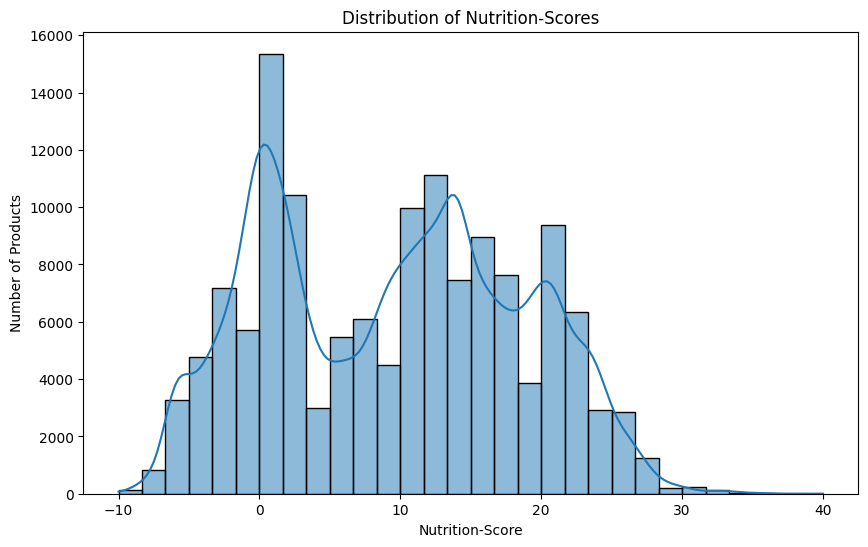

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(data=us_df, x='nutrition-score-fr_100g', bins=30, kde = True)
plt.title('Distribution of Nutrition-Scores')
plt.xlabel('Nutrition-Score')
plt.ylabel('Number of Products')
plt.show()

In [ ]:
us_df.nutrition_grade_fr.fillna('no grade', inplace=True)
us_df.nutrition_grade_fr.value_counts()

<ipython-input-18-7736f186a1f3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_df.nutrition_grade_fr.fillna('no grade', inplace=True)


,count
nutrition_grade_fr,
d,40321
no grade,34083
c,27986
e,27298
a,21865
b,21606


In [ ]:
us_df['nutrition_grade_fr'].replace(0, 'unknown', inplace=True)

<ipython-input-33-b1bde9fe7b8c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  us_df['nutrition_grade_fr'].replace(0, 'unknown', inplace=True)
<ipython-input-33-b1bde9fe7b8c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_df['nutrition_grade_fr'].replace(0, 'unknown', inplace=True)


In [ ]:
with_grade = us_df[us_df['nutrition_grade_fr'] != 'unknown'].shape[0]
without_grade = us_df[us_df['nutrition_grade_fr'] == 'unknown'].shape[0]
grading_percentage= (with_grade / len(us_df)) * 100
no_grading_percentage = (without_grade / len(us_df)) * 100

print(f"Percentage of products with a nutrition grade: {grading_percentage:.2f}%")
print(f"Percentage of products without a nutrition grade: {no_grading_percentage:.2f}%")


Percentage of products with a nutrition grade: 80.32%
Percentage of products without a nutrition grade: 19.68%


# Distribution of Nutrition grade UK






<ipython-input-35-f32ce63757ab>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='nutrition_grade_fr', data=us_df, order=['a', 'b', 'c', 'd', 'e', 'unknown'], palette=nutrition_grade_colours)


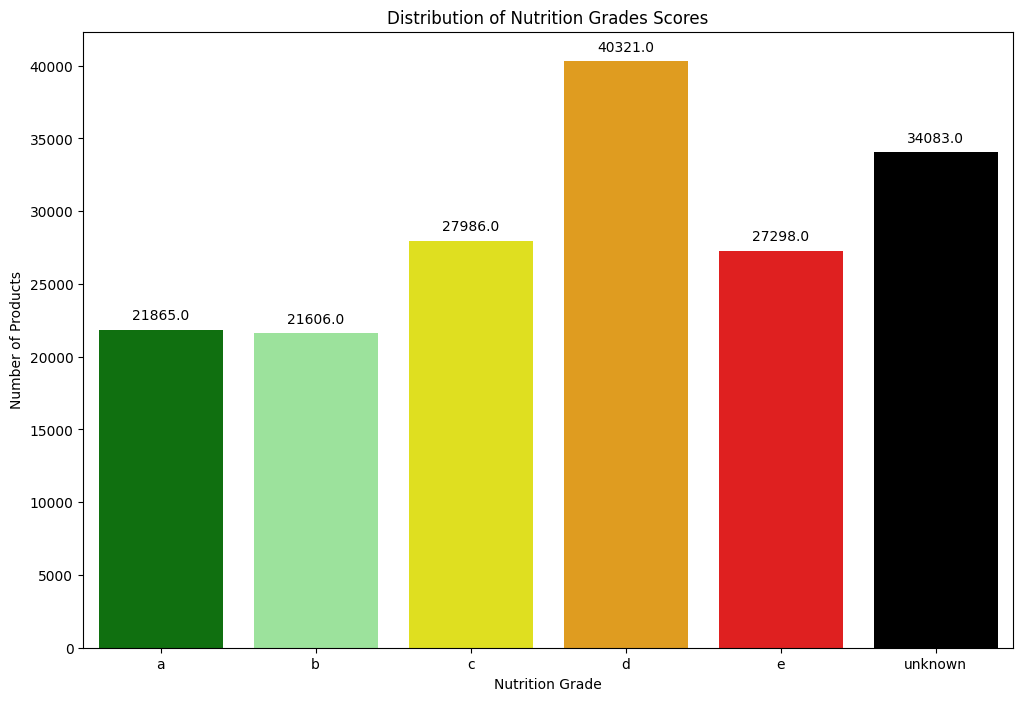

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
nutrition_grade_colours = ['green', 'lightgreen', 'yellow', 'orange', 'red', 'black']  # Corresponding to ['a', 'b', 'c', 'd', 'e']
ax = sns.countplot(x='nutrition_grade_fr', data=us_df, order=['a', 'b', 'c', 'd', 'e', 'unknown'], palette=nutrition_grade_colours)
plt.title('Distribution of Nutrition Grades Scores')
plt.xlabel('Nutrition Grade')
plt.ylabel('Number of Products')

# Add annotations for each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

# Distribution of Nutrition grades across Top 10 categories

In [ ]:
us_df['categories'].replace(0, 'unknown', inplace=True)

<ipython-input-36-d57a383610c3>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  us_df['categories'].replace(0, 'unknown', inplace=True)
<ipython-input-36-d57a383610c3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_df['categories'].replace(0, 'unknown', inplace=True)


This is the distribution of nutrition grades across top 10 categories excluding unknown categories of products from our data

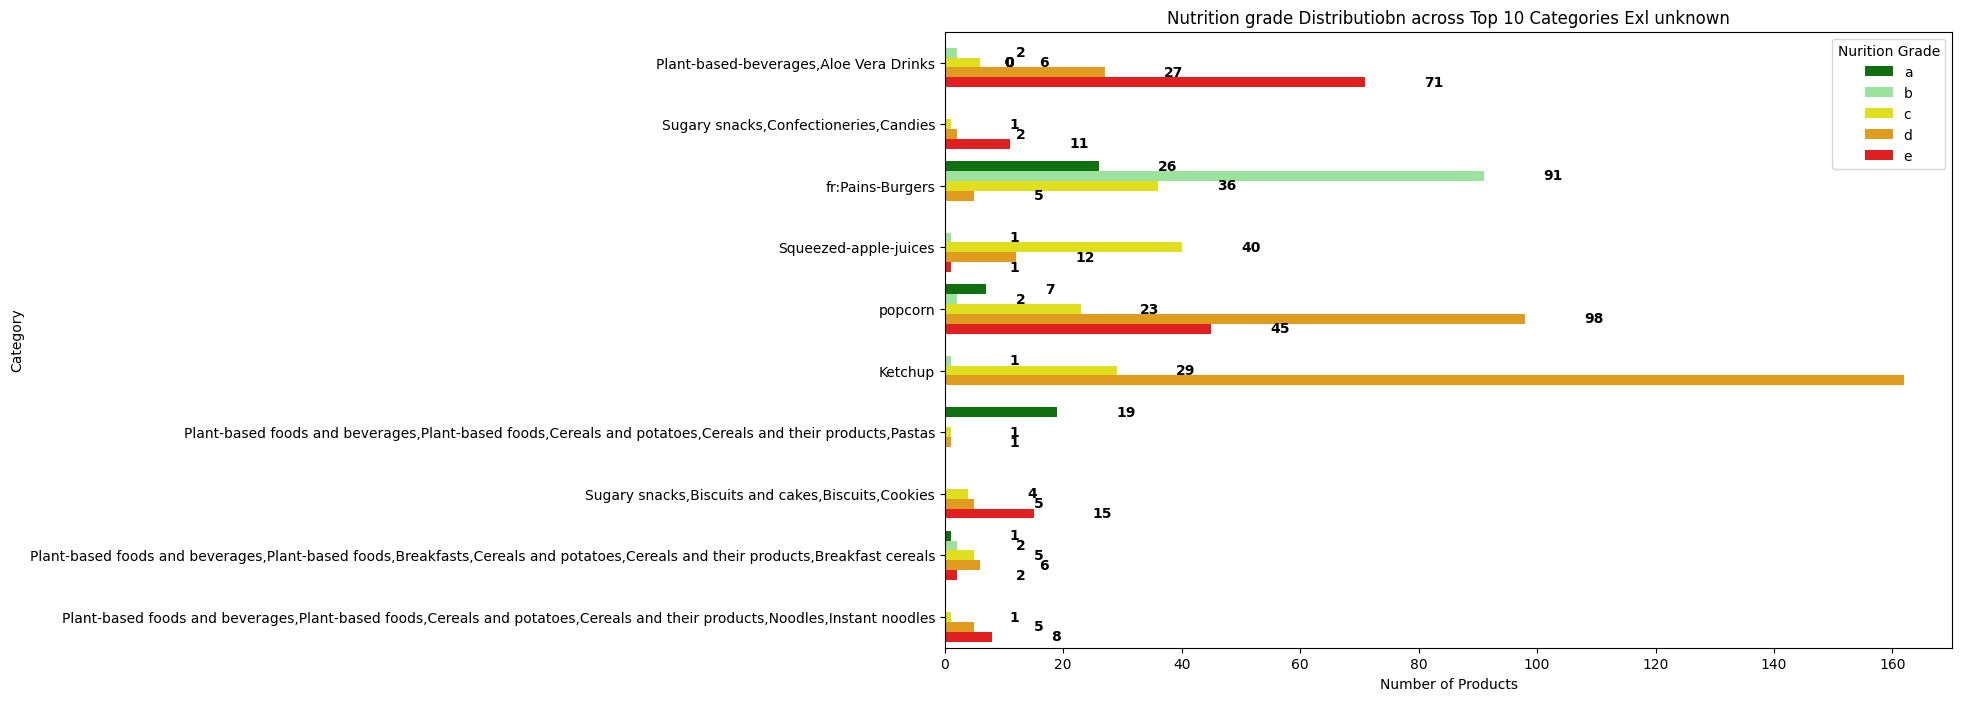

In [ ]:
# Nutrition grades Distribution across Top 10 Categories
nutrition_score_colors = {'a': 'green', 'b': 'lightgreen', 'c': 'yellow', 'd': 'orange', 'e': 'red'}
top_categories = us_df[(us_df['nutrition_grade_fr'] != 'unknown') & (us_df['categories']!= 'unknown')]['categories'].value_counts().head(10).index

plt.figure(figsize=(13, 8))
ax = sns.countplot(y='categories', hue='nutrition_grade_fr', data= us_df[(us_df['nutrition_grade_fr'] != 'unknown') & (us_df['categories'].isin(top_categories))],
                   hue_order=['a', 'b', 'c', 'd', 'e'], palette=nutrition_score_colors)

# Annotate each bar with its count
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_x() + width, p.get_y() + height / 2
    ax.annotate(f'{int(width)}', (x + 10, y), ha='left', va='center', color='black', weight='bold', fontsize=10)

plt.title('Nutrition grade Distributiobn across Top 10 Categories Exl unknown')
plt.xlabel('Number of Products')
plt.ylabel('Category')
plt.legend(title='Nurition Grade')
plt.show()

We will create various data frames based on their identification, types of ingredients used, allergens in food products and in where product packaged into.


In [ ]:
# Product Identification DataFrame
product_identification_df = us_df[['code', 'product_name', 'brands']]

# Nutritional Information DataFrame
nutritional_info_df = us_df[['ingredients_text']]

# Allergens DataFrame
allergens_df = us_df[['allergens']]

# Packaging Information DataFrame
packaging_info_df = us_df[['packaging', 'packaging_tags']]
